In [1]:
#!pip install librosa


In [2]:
import librosa 
import librosa.display
import IPython.display as ipd
import os
from glob import glob
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import random 
import numpy as np 

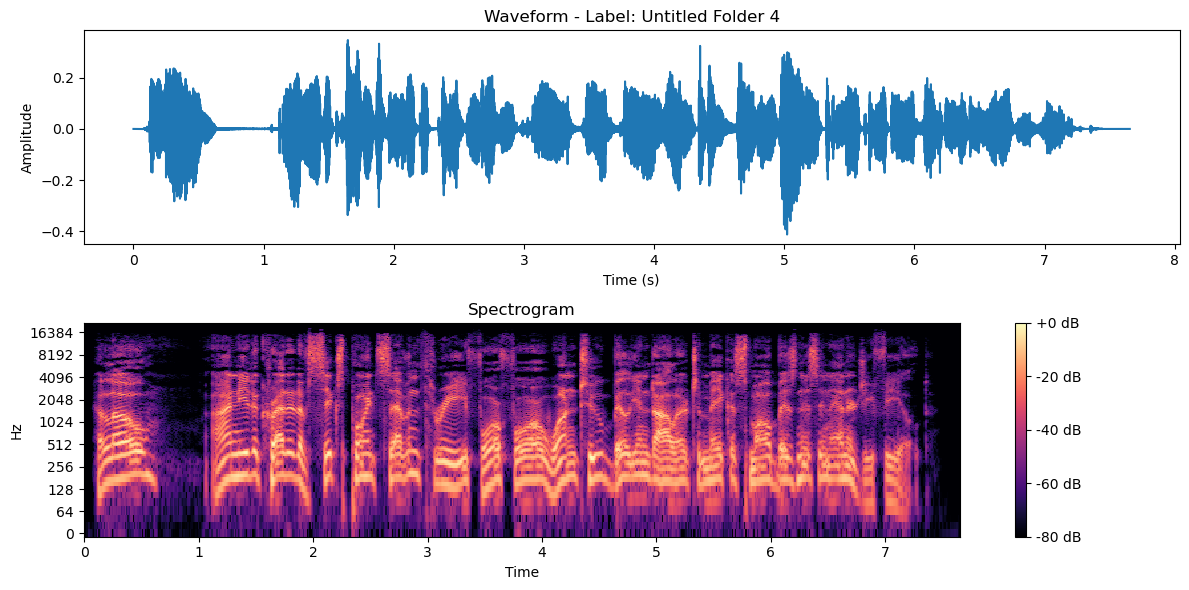

In [3]:
def visualize_audio(audio_file, label):
    y, sr = librosa.load(audio_file, sr=None)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.title(f'Waveform - Label: {label}')
    plt.plot(np.arange(len(y)) / sr, y) 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 1, 2)
    plt.title('Spectrogram')
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
data_folder = "Untitled Folder 4"
def choose_random_audio_file(folder):
    return random.choice([os.path.join(folder, file) for file in os.listdir(folder)])
random_audio_file = choose_random_audio_file(data_folder)
label = os.path.basename(os.path.dirname(random_audio_file))
display(Audio(data=random_audio_file))
visualize_audio(random_audio_file, label)


In [4]:
# !pip install langdetect


In [5]:
import os
import pandas as pd
from langdetect import detect
import speech_recognition as sr
import re
data_folder = "Untitled Folder 4"
columns = ['File Name', 'Language', 'Transcription', 'Credit Amounts']
data = []
def transcribe_audio(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)
    try:
        transcribed_text = recognizer.recognize_google(audio_data)
        return transcribed_text
    except sr.UnknownValueError:
        return "Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Error with the speech recognition service: {str(e)}"
def detect_language(text):
    try:
        language = detect(text)
        return language
    except:
        return "unknown"
def extract_credit_amount(transcribed_text):
    pattern = r'\b(?:\d{1,3}(?:,\d{3})*(?:\.\d+)?)(?: million|billion|euro|dinar)?\b'
    matches = re.findall(pattern, transcribed_text, flags=re.IGNORECASE)
    return matches
for file_name in os.listdir(data_folder):
    if file_name.endswith(".wav"):  # Adjust file extension as per your audio files
        file_path = os.path.join(data_folder, file_name)
        
        transcription = transcribe_audio(file_path)
        
        language = detect_language(transcription)
        
        credit_amounts = extract_credit_amount(transcription)
        
        data.append({
            'File Name': file_name, 
            'Language': language,
            'Transcription': transcription,
            'Credit Amounts': credit_amounts
        })

df = pd.DataFrame(data)

print(df)


                                           File Name Language  \
0  ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...       en   
1  ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...       en   
2  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...       en   
3  ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...       en   
4  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...       en   
5  ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...       en   
6  ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...       en   

                                       Transcription Credit Amounts  
0  hello I need a credit of $8,900 to buy some ma...        [8,900]  
1  hello I need a credit of $230 to buy some mate...          [230]  
2  hello I need a credit of 6.734 412 billion dol...   [6.734, 412]  
3  hello I need a credit of 6.73 4412 billion dol...         [6.73]  
4  hello I need a credit of 4.763 000 billion dol...   [4.763, 000]  
5  hello I need a credit of 50 billion to make a ...       

In [6]:
# pip install googletrans==4.0.0-rc1


In [7]:
# pip install mtranslate


In [8]:
# pip install forex-python


In [9]:
import os
import pandas as pd
from langdetect import detect
import speech_recognition as sr
import re
from googletrans import Translator

translator = Translator()

data_folder = "Untitled Folder 4"

conversion_rates = {
    'USD': {'TND': 3.1, 'EUR': 0.82},  
}

def transcribe_audio(audio_file):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)

    try:
        transcribed_text = recognizer.recognize_google(audio_data)
        return transcribed_text
    except sr.UnknownValueError:
        return "Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Error with the speech recognition service: {str(e)}"

def detect_language(text):
    try:
        language = detect(text)
        return language
    except:
        return "unknown"

def extract_credit_amount(transcribed_text):
    pattern = r'\b(?:\d{1,3}(?:,\d{3})*(?:\.\d+)?)(?: million|billion|euro|dinar)?\b'
    matches = re.findall(pattern, transcribed_text, flags=re.IGNORECASE)
    return matches

def translate_to_french(text):
    french_translation = translator.translate(text, src='en', dest='fr').text
    return french_translation

def translate_to_arabic(text):
    arabic_translation = translator.translate(text, src='en', dest='ar').text
    return arabic_translation

def convert_currency(amount, from_currency, to_currency):
    if from_currency in conversion_rates and to_currency in conversion_rates[from_currency]:
        return amount * conversion_rates[from_currency][to_currency]
    else:
        return "Conversion rate not available"

data = []
for file_name in os.listdir(data_folder):
    if file_name.endswith(".wav"):  
        file_path = os.path.join(data_folder, file_name)
        
        transcription = transcribe_audio(file_path)
        
        language = detect_language(transcription)
        
        credit_amounts = extract_credit_amount(transcription)
        
        french_translation = translate_to_french(transcription)
        
        arabic_translation = translate_to_arabic(transcription)
        
        dinar_credit_amounts = [convert_currency(float(amount.replace(',', '').replace(' ', '')), 'USD', 'TND') for amount in credit_amounts]
        euro_credit_amounts = [convert_currency(float(amount.replace(',', '').replace(' ', '')), 'USD', 'EUR') for amount in credit_amounts]
        
        for amount, dinar_amount, euro_amount in zip(credit_amounts, dinar_credit_amounts, euro_credit_amounts):
            data.append({
                'File Name': file_name, 
                'Language': language,
                'Transcription': f"{language}: {transcription}",
                'Translated Transcription (French)': f"French: {french_translation}",
                'Translated Transcription (Arabic)': f"Arabic: {arabic_translation}",
                'Credit Amounts': amount,
                'Converted Credit Amounts (Dinar)': dinar_amount,
                'Converted Credit Amounts (Euro)': euro_amount
            })

df = pd.DataFrame(data)

print(df)


                                           File Name Language  \
0  ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...       en   
1  ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...       en   
2  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...       en   
3  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...       en   
4  ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...       en   
5  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...       en   
6  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...       en   
7  ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...       en   
8  ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...       en   

                                       Transcription  \
0  en: hello I need a credit of $8,900 to buy som...   
1  en: hello I need a credit of $230 to buy some ...   
2  en: hello I need a credit of 6.734 412 billion...   
3  en: hello I need a credit of 6.734 412 billion...   
4  en: hello I need a credit of 6.73 4412 billion...   
5  en: hello 

In [10]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro)
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000
7,ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...,en,en: hello I need a credit of 50 billion to mak...,"French: Bonjour, j'ai besoin d'un crédit de 50...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 50 مليا...,50,155.0000,41.00000
8,ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...,en,en: morning I want an amount of 2.300 billion ...,"French: matin je veux un montant de 2,300 mill...",Arabic: صباحًا أريد مبلغًا قدره 2.300 مليار دو...,2.300,7.1300,1.88600


## tokenize text data using the Natural Language Toolkit (NLTK) 

In [11]:
# pip install nltk


In [12]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function to tokenize text using NLTK
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Tokenize each text field in the DataFrame
for column in ['Transcription', 'Translated Transcription (French)', 'Translated Transcription (Arabic)']:
    df[column + '_Tokens'] = df[column].apply(tokenize_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro),Transcription_Tokens,Translated Transcription (French)_Tokens,Translated Transcription (Arabic)_Tokens
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000,"[en, :, hello, I, need, a, credit, of, $, 8,90...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000,"[en, :, hello, I, need, a, credit, of, $, 230,...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860,"[en, :, hello, I, need, a, credit, of, 6.73, 4...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
7,ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...,en,en: hello I need a credit of 50 billion to mak...,"French: Bonjour, j'ai besoin d'un crédit de 50...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 50 مليا...,50,155.0000,41.00000,"[en, :, hello, I, need, a, credit, of, 50, bil...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر..."
8,ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...,en,en: morning I want an amount of 2.300 billion ...,"French: matin je veux un montant de 2,300 mill...",Arabic: صباحًا أريد مبلغًا قدره 2.300 مليار دو...,2.300,7.1300,1.88600,"[en, :, morning, I, want, an, amount, of, 2.30...","[French, :, matin, je, veux, un, montant, de, ...","[Arabic, :, صباحًا, أريد, مبلغًا, قدره, 2.300,..."


##  Text Classification for Domain of Work


In [14]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary

corpus = df['Transcription_Tokens'].tolist()

dictionary = Dictionary(corpus)
corpus = [dictionary.doc2bow(tokens) for tokens in corpus]

# Train the LDA model
num_topics = 5  
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

transcription_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Assign domains based on the most prevalent topics
domain_labels = []
for topics in transcription_topics:
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    domain_labels.append(dominant_topic)

df['Domain_of_Work'] = domain_labels
df.to_csv('df_with_domains.csv', index=False)


In [15]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro),Transcription_Tokens,Translated Transcription (French)_Tokens,Translated Transcription (Arabic)_Tokens,Domain_of_Work
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000,"[en, :, hello, I, need, a, credit, of, $, 8,90...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000,"[en, :, hello, I, need, a, credit, of, $, 230,...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860,"[en, :, hello, I, need, a, credit, of, 6.73, 4...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2
7,ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...,en,en: hello I need a credit of 50 billion to mak...,"French: Bonjour, j'ai besoin d'un crédit de 50...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 50 مليا...,50,155.0000,41.00000,"[en, :, hello, I, need, a, credit, of, 50, bil...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2
8,ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...,en,en: morning I want an amount of 2.300 billion ...,"French: matin je veux un montant de 2,300 mill...",Arabic: صباحًا أريد مبلغًا قدره 2.300 مليار دو...,2.300,7.1300,1.88600,"[en, :, morning, I, want, an, amount, of, 2.30...","[French, :, matin, je, veux, un, montant, de, ...","[Arabic, :, صباحًا, أريد, مبلغًا, قدره, 2.300,...",1


In [16]:
from gensim import corpora, models
import pprint

transcription_tokens = df['Transcription_Tokens']
dictionary = corpora.Dictionary(transcription_tokens)
corpus = [dictionary.doc2bow(tokens) for tokens in transcription_tokens]

# Train the LDA model
num_topics = 5  
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get the dominant topic for each transcription
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for transcript_bow in corpus:
        transcript_topics = lda_model[transcript_bow]
        dominant_topic = max(transcript_topics, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

dominant_topics = get_dominant_topic(lda_model, corpus)
for idx, topic in enumerate(dominant_topics):
    print(f"Transcription {idx}: Dominant Topic - {topic}")
pprint.pprint(lda_model.print_topics())


Transcription 0: Dominant Topic - 2
Transcription 1: Dominant Topic - 2
Transcription 2: Dominant Topic - 2
Transcription 3: Dominant Topic - 2
Transcription 4: Dominant Topic - 4
Transcription 5: Dominant Topic - 4
Transcription 6: Dominant Topic - 4
Transcription 7: Dominant Topic - 4
Transcription 8: Dominant Topic - 2
[(0,
  '0.022*"a" + 0.022*"field" + 0.022*"I" + 0.022*"credit" + 0.022*"4.763" + '
  '0.022*"billion" + 0.022*"000" + 0.022*"of" + 0.022*"in" + 0.022*"hello"'),
 (1,
  '0.022*"to" + 0.022*"of" + 0.022*"credit" + 0.022*"hello" + 0.022*"in" + '
  '0.022*"I" + 0.022*"work" + 0.022*"buy" + 0.022*"need" + 0.022*"a"'),
 (2,
  '0.081*"to" + 0.044*"in" + 0.044*"I" + 0.044*"en" + 0.044*":" + 0.044*"of" + '
  '0.042*"a" + 0.038*"need" + 0.038*"hello" + 0.038*"credit"'),
 (3,
  '0.022*"to" + 0.022*"230" + 0.022*"$" + 0.022*"agriculture" + 0.022*"field" '
  '+ 0.022*"hello" + 0.022*"need" + 0.022*"credit" + 0.022*"of" + '
  '0.022*"with"'),
 (4,
  '0.093*"a" + 0.055*"business" + 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
def remove_numericals(text):
    return re.sub(r'\d+', '', text)


# Initialize TF-IDF vectorizer
tfidf_vectorizer_transcription = TfidfVectorizer(max_features=1000, stop_words='english')
# Define a function to remove stopwords
def remove_stopwords(text, stopwords_list):
    filtered_text = [word for word in text.split() if word.lower() not in stopwords_list]
    return ' '.join(filtered_text)

# Define additional stopwords to be removed
additional_stopwords = {'hello', 'morning', 'want', 'need',"searching", "applying", "seeking", "loan", "credit","request","billion","dollar","euro","dinar","buy","make","domain","field","amount"}  # Add any other words you want to exclude

stopwords_list = set(stopwords.words('english')).union(additional_stopwords)
tfidf_vectorizer = TfidfVectorizer()
df['Filtered_Transcription'] = df['Transcription'].apply(lambda x: remove_stopwords(x, stopwords_list))
df['Filtered_Transcription'] = df['Filtered_Transcription'].apply(remove_numericals)

tfidf_vectorizer_transcription = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix_transcription = tfidf_vectorizer.fit_transform(df['Filtered_Transcription'])

# Extract keywords based on TF-IDF scores for filtered transcriptions
feature_names_transcription = tfidf_vectorizer.get_feature_names_out()
keyword_indices_transcription = tfidf_matrix_transcription.argmax(axis=1)
keywords_transcription = [feature_names_transcription[idx] for idx in keyword_indices_transcription]
df['Keywords_Transcription'] = keywords_transcription

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro),Transcription_Tokens,Translated Transcription (French)_Tokens,Translated Transcription (Arabic)_Tokens,Domain_of_Work,Filtered_Transcription,Keywords_Transcription
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000,"[en, :, hello, I, need, a, credit, of, $, 8,90...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,"en: $, materials work agriculture",[[agriculture]]
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000,"[en, :, hello, I, need, a, credit, of, $, 230,...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,en: $ materials work agriculture,[[agriculture]]
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]]
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]]
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860,"[en, :, hello, I, need, a, credit, of, 6.73, 4...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]]
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]]
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]]
7,ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...,en,en: hello I need a credit of 50 billion to mak...,"French: Bonjour, j'ai besoin d'un crédit de 50...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 50 مليا...,50,155.0000,41.00000,"[en, :, hello, I, need, a, credit, of, 50, bil...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: small business finance,[[finance]]
8,ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...,en,en: morning I want an amount of 2.300 billion ...,"French: matin je veux un montant de 2,300 mill...",Arabic: صباحًا أريد مب

In [19]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary

corpus = df['Transcription_Tokens'].tolist()
dictionary = Dictionary(corpus)
corpus = [dictionary.doc2bow(tokens) for tokens in corpus]

num_topics = 5 
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
transcription_topics = [lda_model.get_document_topics(doc) for doc in corpus]
domain_labels = []
for topics in transcription_topics:
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    domain_labels.append(dominant_topic)

df['Domain'] = domain_labels
df.to_csv('df_with_domains.csv', index=False)

In [20]:
from gensim import corpora, models
import pandas as pd


dictionary = corpora.Dictionary(df['Transcription_Tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['Transcription_Tokens']]
num_topics = 5 
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for transcript_bow in corpus:
        transcript_topics = lda_model[transcript_bow]
        dominant_topic = max(transcript_topics, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

dominant_topics = get_dominant_topic(lda_model, corpus)

domain_mapping = {
    0: 'Education',
    1: 'Real Estate',
    2: 'Business',
    3: 'Medical',
    4: 'Technology',
    5: 'Telecommunications',
    6: 'Retail',
    7: 'Transport',
    8: 'Automotive',
    9: 'Chemicals',
    10: 'Holding',
    11: 'Oil and gas',
    12: 'Construction',
    13: 'Airline',
    14: 'Mining',
    15: 'Pharmaceuticals',
    16: 'Agroindustry',
    17: 'Information technology',
    18: 'Pulp and paper',
    19: 'Steel',
    20: 'Conglomerate',
    21: 'Healthcare',
    22: 'Energy',
    23: 'Wholesale',
    24: 'Electric utility',
    25: 'Chemistry',
    26: 'Finance',
    27: 'Cement'
}

df['Dominant_Topic'] = dominant_topics
df['Domain'] = df['Dominant_Topic'].map(domain_mapping)



In [21]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro),Transcription_Tokens,Translated Transcription (French)_Tokens,Translated Transcription (Arabic)_Tokens,Domain_of_Work,Filtered_Transcription,Keywords_Transcription,Domain,Dominant_Topic
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000,"[en, :, hello, I, need, a, credit, of, $, 8,90...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,"en: $, materials work agriculture",[[agriculture]],Medical,3
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000,"[en, :, hello, I, need, a, credit, of, $, 230,...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,en: $ materials work agriculture,[[agriculture]],Medical,3
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]],Medical,3
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]],Medical,3
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860,"[en, :, hello, I, need, a, credit, of, 6.73, 4...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0
7,ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...,en,en: hello I need a credit of 50 billion to mak...,"French: Bonjour, j'ai besoin d'un crédit de 50...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 50 مليا...,50,155.0000,41.00000,"[en, :, hello, I, need, a, credit, of, 50, bil...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: small business finance,[[finance]],Education,0
8,ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...,en,en: morning I 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
def remove_numericals(text):
    return re.sub(r'\d+', '', text)
def remove_stopwords(text, stopwords_list):
    filtered_text = [word for word in text.split() if word.lower() not in stopwords_list]
    return ' '.join(filtered_text)

additional_stopwords = {'hello', 'morning', 'want', 'need',"searching", "applying", "seeking", "loan", "credit","requesting","pay","require"}  # Add any other words you want to exclude

stopwords_list = set(stopwords.words('english')).union(additional_stopwords)

tfidf_vectorizer = TfidfVectorizer()

df['Loan Purpose'] = df['Transcription'].apply(lambda x: remove_stopwords(x, stopwords_list))
df['Loan Purpose'] = df['Filtered_Transcription'].apply(remove_numericals)

tfidf_matrix_transcription = tfidf_vectorizer.fit_transform(df['Filtered_Transcription'])

feature_names_transcription = tfidf_vectorizer.get_feature_names_out()
keyword_indices_transcription = tfidf_matrix_transcription.argmax(axis=1)
keywords_transcription = [feature_names_transcription[idx] for idx in keyword_indices_transcription]

df['Keywords_Transcription'] = keywords_transcription

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro),Transcription_Tokens,Translated Transcription (French)_Tokens,Translated Transcription (Arabic)_Tokens,Domain_of_Work,Filtered_Transcription,Keywords_Transcription,Domain,Dominant_Topic,Loan Purpose
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000,"[en, :, hello, I, need, a, credit, of, $, 8,90...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,"en: $, materials work agriculture",[[agriculture]],Medical,3,"en: $, materials work agriculture"
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000,"[en, :, hello, I, need, a, credit, of, $, 230,...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,en: $ materials work agriculture,[[agriculture]],Medical,3,en: $ materials work agriculture
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]],Medical,3,en: . materials work Pharmaceuticals
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]],Medical,3,en: . materials work Pharmaceuticals
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860,"[en, :, hello, I, need, a, credit, of, 6.73, 4...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0,en: . small business energy
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0,en: . small business energy
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0,en: . small business energy
7,ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...,en,en: hello I need a credit of 50 billion to mak...,"French: Bonjour, j'ai besoin d'un crédit de 50...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 50 مليا...,50,155.0000,41.00000,"[en, :, hello, I, need, a, credit, of

In [24]:
import nltk
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')
def pos_tagging(tokens):
    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens
df['POS_Tags'] = df['Transcription_Tokens'].apply(pos_tagging)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
df

,File Name,Language,Transcription,Translated Transcription (French),Translated Transcription (Arabic),Credit Amounts,Converted Credit Amounts (Dinar),Converted Credit Amounts (Euro),Transcription_Tokens,Translated Transcription (French)_Tokens,Translated Transcription (Arabic)_Tokens,Domain_of_Work,Filtered_Transcription,Keywords_Transcription,Domain,Dominant_Topic,Loan Purpose,POS_Tags
0,ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...,en,"en: hello I need a credit of $8,900 to buy som...","French: Bonjour, j'ai besoin d'un crédit de 8 ...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 8900 دو...,"8,900",27590.0000,7298.00000,"[en, :, hello, I, need, a, credit, of, $, 8,90...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,"en: $, materials work agriculture",[[agriculture]],Medical,3,"en: $, materials work agriculture","[(en, NN), (:, :), (hello, NN), (I, PRP), (nee..."
1,ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...,en,en: hello I need a credit of $230 to buy some ...,"French: Bonjour, j'ai besoin d'un crédit de 23...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 230 دول...,230,713.0000,188.60000,"[en, :, hello, I, need, a, credit, of, $, 230,...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",1,en: $ materials work agriculture,[[agriculture]],Medical,3,en: $ materials work agriculture,"[(en, NN), (:, :), (hello, NN), (I, PRP), (nee..."
2,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,6.734,20.8754,5.52188,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]],Medical,3,en: . materials work Pharmaceuticals,"[(en, NN), (:, :), (hello, NN), (I, PRP), (nee..."
3,ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...,en,en: hello I need a credit of 6.734 412 billion...,"French: bonjour j'ai besoin d'un crédit de 6,7...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.734 4...,412,1277.2000,337.84000,"[en, :, hello, I, need, a, credit, of, 6.734, ...","[French, :, bonjour, j'ai, besoin, d'un, crédi...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",3,en: . materials work Pharmaceuticals,[[pharmaceuticals]],Medical,3,en: . materials work Pharmaceuticals,"[(en, NN), (:, :), (hello, NN), (I, PRP), (nee..."
4,ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...,en,en: hello I need a credit of 6.73 4412 billion...,"French: Bonjour, j'ai besoin d'un crédit de 6,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 6.73 44...,6.73,20.8630,5.51860,"[en, :, hello, I, need, a, credit, of, 6.73, 4...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0,en: . small business energy,"[(en, NN), (:, :), (hello, NN), (I, PRP), (nee..."
5,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,4.763,14.7653,3.90566,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business energy,[[energy]],Education,0,en: . small business energy,"[(en, NN), (:, :), (hello, NN), (I, PRP), (nee..."
6,ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...,en,en: hello I need a credit of 4.763 000 billion...,"French: Bonjour, j'ai besoin d'un crédit de 4,...",Arabic: مرحبًا ، أحتاج إلى ائتمان قدره 4.763 م...,000,0.0000,0.00000,"[en, :, hello, I, need, a, credit, of, 4.763, ...","[French, :, Bonjour, ,, j'ai, besoin, d'un, cr...","[Arabic, :, مرحبًا, ،, أحتاج, إلى, ائتمان, قدر...",2,en: . small business ene

In [26]:
print(df['POS_Tags'][0])


[('en', 'NN'), (':', ':'), ('hello', 'NN'), ('I', 'PRP'), ('need', 'VBP'), ('a', 'DT'), ('credit', 'NN'), ('of', 'IN'), ('$', '$'), ('8,900', 'CD'), ('to', 'TO'), ('buy', 'VB'), ('some', 'DT'), ('materials', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('with', 'IN'), ('in', 'IN'), ('the', 'DT'), ('agriculture', 'NN'), ('field', 'NN')]


In [27]:
#  Extract noun tokens from POS tags
df['Noun_Tokens'] = df['POS_Tags'].apply(lambda tags: [token for token, pos_tag in tags if pos_tag == 'NN'])
df['Domain'] = df['Noun_Tokens'].apply(lambda tokens: ', '.join(tokens))
print(df[['File Name', 'Domain']])


                                           File Name  \
0  ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...   
1  ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...   
2  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...   
3  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...   
4  ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...   
5  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...   
6  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...   
7  ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...   
8  ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...   

                                              Domain  
0              en, hello, credit, agriculture, field  
1              en, hello, credit, agriculture, field  
2                          en, hello, credit, dollar  
3                          en, hello, credit, dollar  
4  en, hello, credit, dollar, business, energy, f...  
5  en, hello, credit, dollar, business, energy, f...  
6  en, hello, credit, dollar, business, energy, f...  

In [28]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(tags, stopwords_list):
    filtered_tags = [(word, pos_tag) for word, pos_tag in tags if word.lower() not in stopwords_list]
    return filtered_tags

additional_stopwords = {'hello', 'morning', 'want', 'need', 'searching', 'applying', 'seeking', 'loan', 'credit', 'requesting', 'pay', 'require','domain','field','en','on','dollar','billion','dollar','euro','amount','business'}

stopwords_list = set(stopwords.words('english')).union(additional_stopwords)

df['Filtered_POS_Tags'] = df['POS_Tags'].apply(lambda tags: remove_stopwords(tags, stopwords_list))

df['Noun_Tokens'] = df['Filtered_POS_Tags'].apply(lambda tags: [token for token, pos_tag in tags if pos_tag == 'NN'])

df['Domain'] = df['Noun_Tokens'].apply(lambda tokens: ', '.join(tokens))

print(df[['File Name', 'Domain','Converted Credit Amounts (Dinar)','Loan Purpose']])


                                           File Name              Domain  \
0  ElevenLabs_2024-03-23T13_50_23_Adam_pre_s50_sb...         agriculture   
1  ElevenLabs_2024-03-23T13_51_04_Callum_pre_s50_...         agriculture   
2  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...                       
3  ElevenLabs_2024-03-23T13_54_14_Antoni_pre_s50_...                       
4  ElevenLabs_2024-03-23T13_55_31_Jessie_pre_s50_...              energy   
5  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...              energy   
6  ElevenLabs_2024-03-23T13_56_25_James_pre_s50_s...              energy   
7  ElevenLabs_2024-03-23T13_57_43_Thomas_pre_s50_...             finance   
8  ElevenLabs_2024-03-23T13_59_09_Rachel_pre_s50_...  oil, gas, industry   

   Converted Credit Amounts (Dinar)                           Loan Purpose  
0                        27590.0000      en: $, materials work agriculture  
1                          713.0000       en: $ materials work agriculture  
2       

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
pip show nltk

Name: nltk
Version: 3.8.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.
